<a href="https://colab.research.google.com/github/ealeongomez/Natural-Language-Processing/blob/main/BagWords_and_tf_idf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Load data**

**Internet Movie Database (IMBD)**

1. Preparación de los datos
2. Extracción del vector de característicasd de los datos
3. Entrenamiento de modelo de clasificación con respecto a peliculas (critica positiva o negativa)
 




In [ ]:
!git clone https://github.com/ealeongomez/Data/

Cloning into 'Data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import re

from sklearn.feature_extraction.text import CountVectorizer  # Paquete dque permite la extracción de las bolsa de palabras 
from sklearn.feature_extraction.text import TfidfTransformer  # Paquete de extracción de las características mediante tf-idf

from sklearn.decomposition import PCA                        # Método de redución de dimensiones 


In [2]:
# Cargue de la base de datos 
df = pd.read_csv("/content/Data/datasets_730942_1268848_sarcasmo.tsv", sep="\t", encoding='utf8')

features = df['Locución'].tolist()  # Extracción de las oraciones Characteristics
labels = df['Sarcasmo'].astype(int) # Extracción de las etiquetas

df.head()

,Locutor,Locución,Sarcasmo,Utsumi,hipérbole,Haverkate,Grice,Nakamura,Acto de habla
0,archer,Francamente no,False,NaN,False,NaN,NaN,NaN,NaN
1,cheryl,"Lo del canadiense. Por favor, como que vosotro...",False,NaN,False,NaN,NaN,NaN,NaN
2,archer,Tienes razón. A lo mejor así te liberas de tu ...,False,NaN,False,NaN,NaN,NaN,NaN
3,conway,"Pues, tú sabrás",False,NaN,False,NaN,NaN,NaN,NaN
4,lana,Para mí que fue Krieger,False,NaN,False,NaN,NaN,NaN,NaN


In [3]:
# Impresión de las primeras 5 oraciones
features[0:5]

['Francamente no',
 'Lo del canadiense. Por favor, como que vosotros no os tiraríais allí si pudieseis',
 'Tienes razón. A lo mejor así te liberas de tu energía nagativa',
 'Pues, tú sabrás',
 'Para mí que fue Krieger']

#**Bolsa de palabras**

1. Creación de un diccionario de palabras apartir de un documento base.
2. Construcción del vector de características númericas reemplzando cada palabara por su equivalenccia númerica dentro del diccionario. 

In [4]:
count = CountVectorizer()            # Inicializador de la bolsa de palabras 
docs = np.array(features)            # Conversión de lista a array
bag_words = count.fit_transform(docs) # Creación de la bolsa de palabras de nuestro modelo
bag_words = bag_words.toarray()      # Características 

print(count.vocabulary_)             # impresión del diccionario de palabras
print(bag_words.shape)

{'francamente': 879, 'no': 1433, 'lo': 1253, 'del': 590, 'canadiense': 288, 'por': 1649, 'favor': 860, 'como': 392, 'que': 1731, 'vosotros': 2252, 'os': 1497, 'tiraríais': 2093, 'allí': 76, 'si': 1940, 'pudieseis': 1708, 'tienes': 2086, 'razón': 1774, 'mejor': 1318, 'así': 147, 'te': 2045, 'liberas': 1194, 'de': 558, 'tu': 2138, 'energía': 723, 'nagativa': 1401, 'pues': 1716, 'tú': 2152, 'sabrás': 1856, 'para': 1528, 'mí': 1394, 'fue': 888, 'krieger': 1167, 'qué': 1764, 'un': 2156, 'bebé': 198, 'lando': 1177, 'en': 713, 'serio': 1922, 'randy': 1769, 'creo': 491, 'este': 811, 'deporte': 600, 'le': 1182, 'hizo': 1033, 'algo': 66, 'daño': 557, 'cerebro': 329, 'estáte': 826, 'quieto': 1754, 'esperad': 786, 'ha': 965, 'parecido': 1537, 'archer': 124, 'poco': 1629, 'asustado': 144, 'usted': 2171, 'me': 1314, 'jode': 1127, 'al': 62, 'carajo': 302, 'dios': 645, 'pibe': 1605, 'ya': 2270, 'oigo': 1485, 'claro': 363, 'él': 2278, 'fuma': 896, 'junto': 1155, 'la': 1169, 'niña': 1429, 'decir': 571, 

(array([-6., -4., -2.,  0.,  2.,  4.,  6.,  8.]),
 <a list of 8 Text major ticklabel objects>)

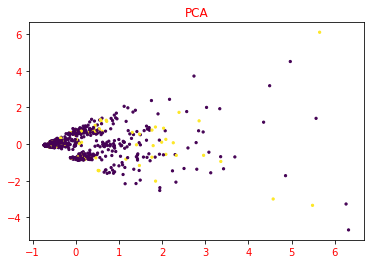

In [5]:
pca = PCA(n_components=2)
tranformed_pca = pca.fit_transform(bag_words)

plt.scatter(tranformed_pca[:,0], tranformed_pca[:,1], s=5, c=labels)
plt.title("PCA", c='r'); 
plt.xticks(c='r')
plt.yticks(c='r')

#**Term Frecuency Inverse Document Frecuency (tf-idf)**
*Relevancia de palabras mediante frecuencia de témino-frecuencia inversa en el documento*

Normalmente en el corpus de una texto encontramoa palabras que aparecen múltiples documentos, y que a su vez estas palaras no contiene información útil dentro del corpus. Para solventar esto, tf-idf proporciona un esquema que reduce el peso de estas palabras repetidas y de poca frecuencia ene l vector de características. Este conceptto esta difinido como el producto de la frecuencia de término y la frecuencia inversa del documento.

$$tf-idf (t,d) = tf(t,d)*idf(t,d)$$

Donde $tf(t,d)$ es la frecuencia de término y $idf(t,d)$ es la frecuencia inversa del documento calculada como:

$$idf(t,d) = log\frac{\eta_d}{1+df(d,t)}$$

Donde $\eta_d$ es el número total de documentos y $df(d,t)$  es el número de documentos $d$ que contienen el término $t$

(array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Text major ticklabel objects>)

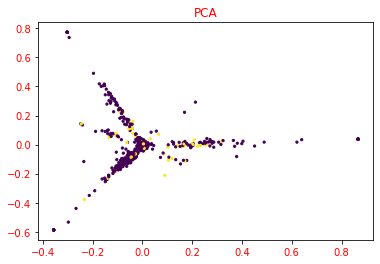

In [6]:
tfidf = TfidfTransformer(use_idf=True,
                         norm='l2',            # Normalización L2 de los valores de la matriz directamente 
                         smooth_idf=True        
)

np.set_printoptions(precision=2)

# Matriz tf-idf
tf_idf = tfidf.fit_transform(count.fit_transform(docs)).toarray()

tranformed_pca = pca.fit_transform(tf_idf)

plt.scatter(tranformed_pca[:,0], tranformed_pca[:,1], s=5, c=labels)
plt.title("PCA", c='r'); 
plt.xticks(c='r')
plt.yticks(c='r')


La librería sklearn calcula la la matriz tf-idf de la siguiente manera:

$$tfidf(t,d) = tf(t,d)*\left( idf(t,d) + 1 \right)$$
